In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/fraud-detection/Module 5 Datset.csv') 
df


,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0
...,...,...,...,...,...,...
9995,DOCTOR,2705,502092127427,09/27,422,1
9996,LAWYER,37862,349490624391408,07/34,811,0
9997,ENGINEER,83152,4990903961714432,11/24,216,1
9998,DOCTOR,90620,4827611166572112,01/33,180,1


In [4]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [5]:
df.tail()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
9995,DOCTOR,2705,502092127427,09/27,422,1
9996,LAWYER,37862,349490624391408,07/34,811,0
9997,ENGINEER,83152,4990903961714432,11/24,216,1
9998,DOCTOR,90620,4827611166572112,01/33,180,1
9999,LAWYER,94529,4906715586330631,12/29,399,1


In [6]:
# Basic info about dataset: columns, data types, non-null counts
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [7]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


In [8]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64


In [10]:
df.columns

Index(['Profession', 'Income', 'Credit_card_number', 'Expiry', 'Security_code',
       'Fraud'],
      dtype='object')

In [11]:
# Drop sensitive columns
df = df.drop(['Credit_card_number', 'Security_code'], axis=1)

In [12]:
# Convert Expiry to datetime (month/year)
df['Expiry'] = pd.to_datetime(df['Expiry'], format='%m/%y')

In [13]:
# Fraud rate by Profession
fraud_by_prof = df.groupby('Profession')['Fraud'].mean().sort_values(ascending=False)
print("Fraud rate by Profession:")
print(fraud_by_prof)

Fraud rate by Profession:
Profession
DOCTOR      0.520568
LAWYER      0.500745
ENGINEER    0.482843
Name: Fraud, dtype: float64


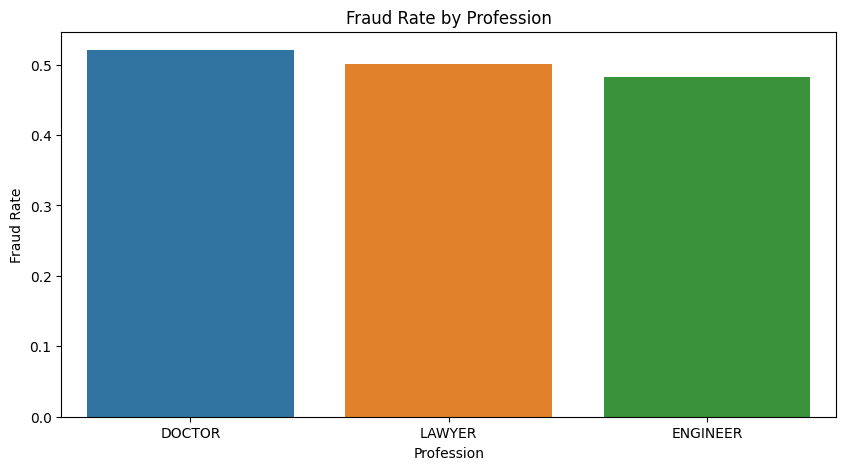

In [16]:
# Plot fraud rate by Profession
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_prof.index, y=fraud_by_prof.values)
plt.title('Fraud Rate by Profession')
plt.ylabel('Fraud Rate')
plt.xlabel('Profession')
plt.show()


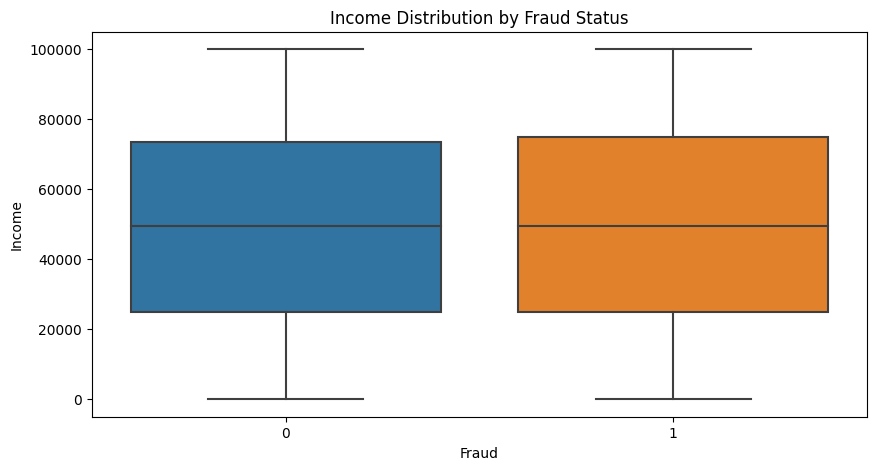

In [17]:
# Income distribution by fraud status
plt.figure(figsize=(10,5))
sns.boxplot(x='Fraud', y='Income', data=df)
plt.title('Income Distribution by Fraud Status')
plt.show()

In [20]:
# One-hot encode the 'Profession' categorical column
df_encoded = pd.get_dummies(df, columns=['Profession'])

In [21]:
# Show the first few rows of the new encoded dataframe
print("Data after encoding 'Profession':")
display(df_encoded.head())

Data after encoding 'Profession':


,Income,Expiry,Fraud,Profession_DOCTOR,Profession_ENGINEER,Profession_LAWYER
0,42509,2025-07-01,1,True,False,False
1,80334,2032-05-01,1,True,False,False
2,91552,2030-03-01,1,False,False,True
3,43623,2029-01-01,1,False,False,True
4,22962,2030-11-01,0,True,False,False


In [22]:
# Check for duplicate rows
duplicate_count = df_encoded.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if any
if duplicate_count > 0:
    df_encoded = df_encoded.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 1
Duplicates removed.


In [23]:
# Summary stats for numerical columns
print(df_encoded.describe())

             Income                         Expiry        Fraud
count   9999.000000                           9999  9999.000000
mean   49763.707871  2029-10-12 09:31:35.589559040     0.501550
min        1.000000            2024-11-01 00:00:00     0.000000
25%    24868.000000            2027-05-01 00:00:00     0.000000
50%    49484.000000            2029-10-01 00:00:00     1.000000
75%    74484.000000            2032-04-01 00:00:00     1.000000
max    99986.000000            2034-11-01 00:00:00     1.000000
std    28838.086072                            NaN     0.500023


In [24]:
# Count unique values and class balance for 'Fraud'
print(df_encoded['Fraud'].value_counts())
print(df_encoded['Fraud'].value_counts(normalize=True))

Fraud
1    5015
0    4984
Name: count, dtype: int64
Fraud
1    0.50155
0    0.49845
Name: proportion, dtype: float64


In [25]:
# Profession distribution (original categorical)
print(df['Profession'].value_counts())

Profession
DOCTOR      3379
LAWYER      3357
ENGINEER    3264
Name: count, dtype: int64


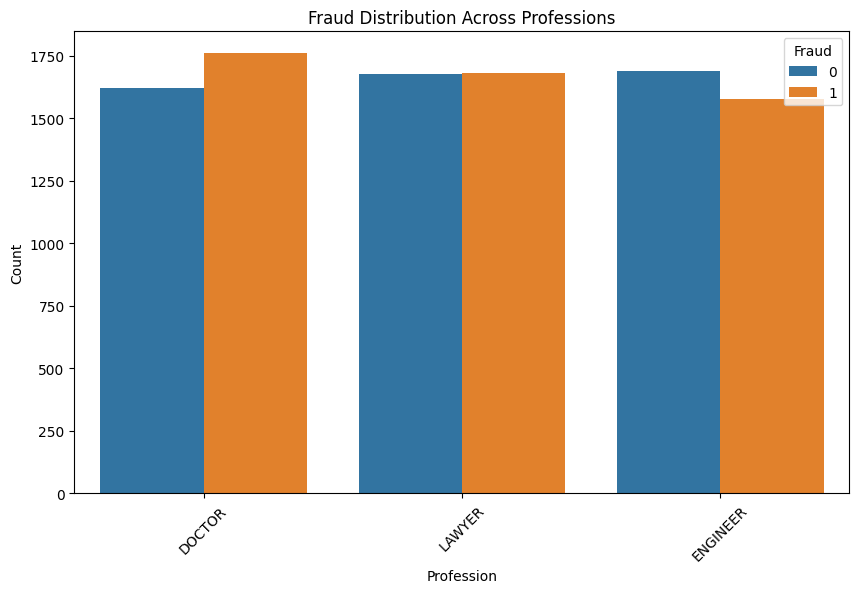

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Profession', hue='Fraud')
plt.title('Fraud Distribution Across Professions')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

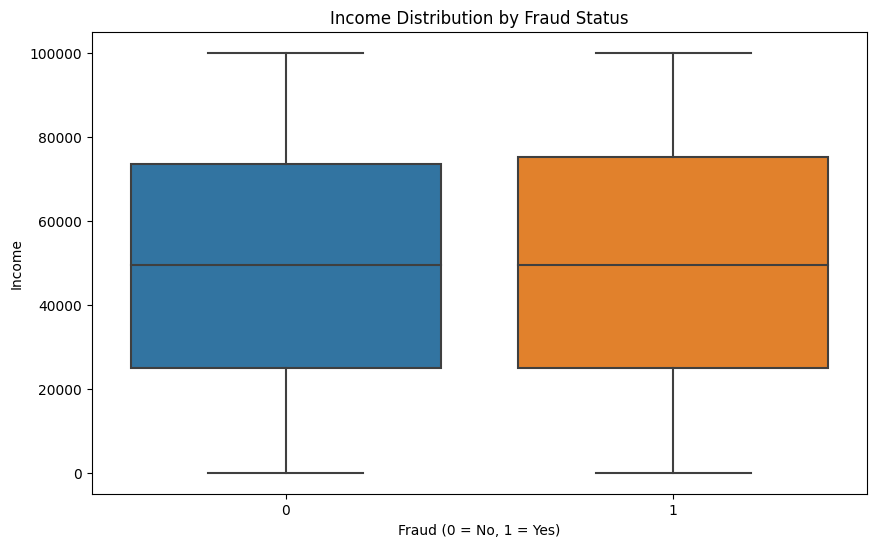

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fraud', y='Income')
plt.title('Income Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

Fraud                  1.000000
Profession_DOCTOR      0.027175
Income                 0.007451
Profession_LAWYER     -0.001356
Expiry                -0.018213
Profession_ENGINEER   -0.026046
Name: Fraud, dtype: float64


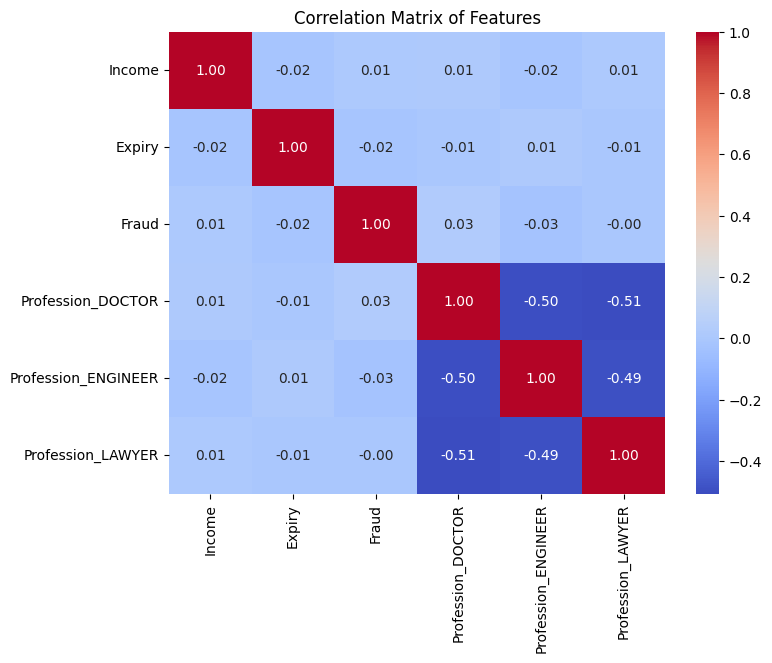

In [28]:
corr_matrix = df_encoded.corr()
print(corr_matrix['Fraud'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [29]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Number of outliers in Income: {outliers.shape[0]}")

Number of outliers in Income: 0


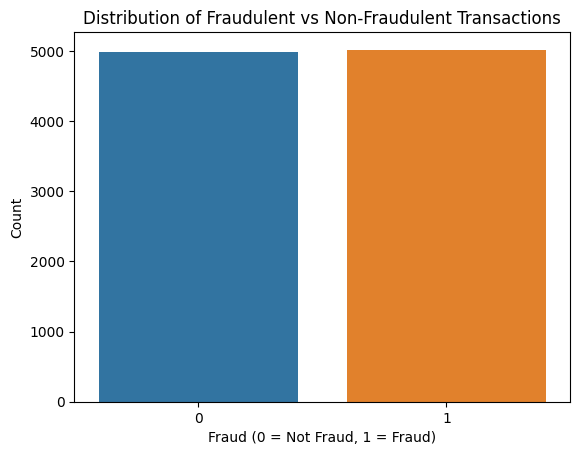

In [30]:
sns.countplot(data=df, x='Fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

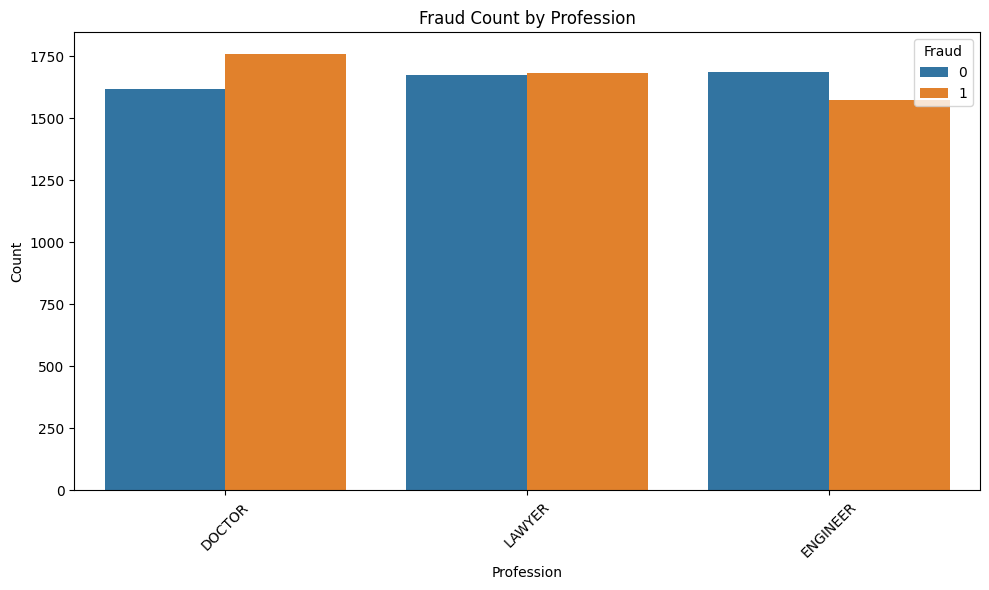

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', hue='Fraud')
plt.title('Fraud Count by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()

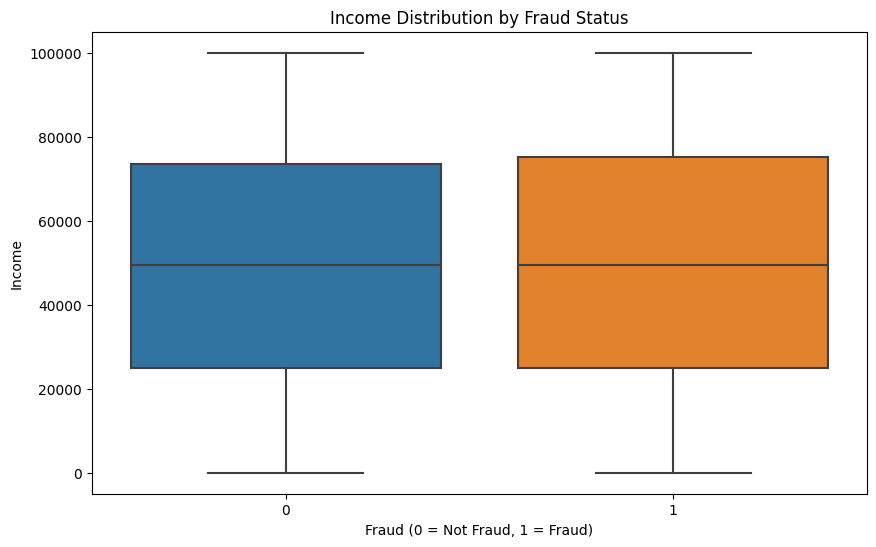

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fraud', y='Income', data=df)
plt.title('Income Distribution by Fraud Status')
plt.xlabel('Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Income')
plt.show()


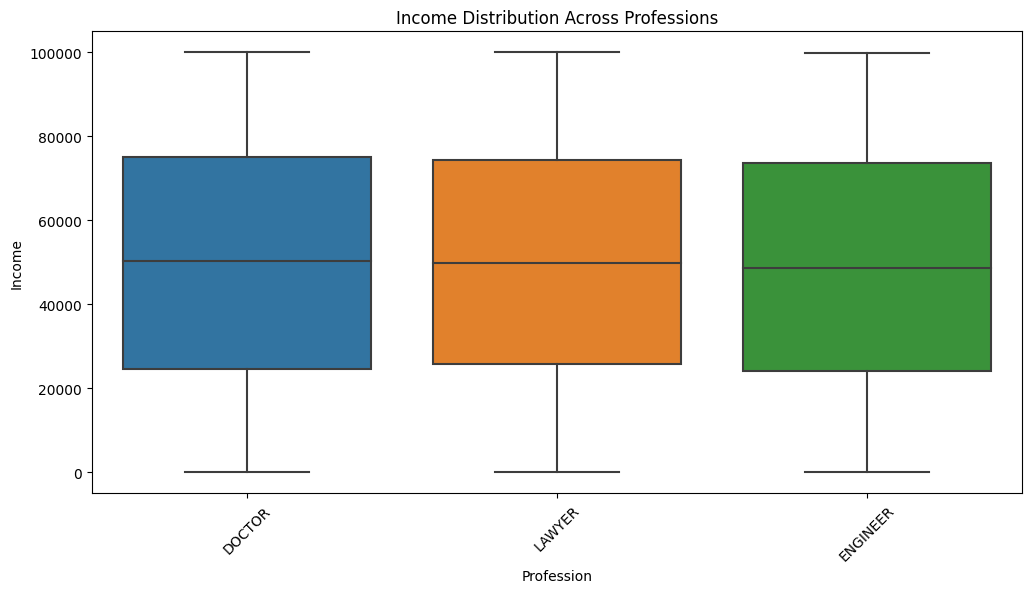

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Profession', y='Income', data=df)
plt.title('Income Distribution Across Professions')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()
